<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-10-ml-classification/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

df = sns.load_dataset("mpg")

In [ ]:
# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

names = {'usa': 0, 'japan': 1, 'europe':2}
df.dropna(inplace=True)
df = df.drop('name', axis=1)
df['origin'] = df['origin'].map(names)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE
X = df.drop('mpg', axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Fit a decision tree
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predict on the xtest set
# INSERT CODE HERE
dtr_preds = modelDTR.predict(X_test)

In [ ]:
# Print out the R2 score.
r2_score(y_test, dtr_preds)

0.7679558082160508

In [ ]:
# Print each feature with importance %
feature_import = zip(X.columns, modelDTR.feature_importances_)
[print(x[0],':', round(x[1],2)*100)for x in feature_import]

cylinders : 0.0
displacement : 63.0
horsepower : 17.0
weight : 6.0
acceleration : 2.0
model_year : 10.0
origin : 0.0


[None, None, None, None, None, None, None]

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


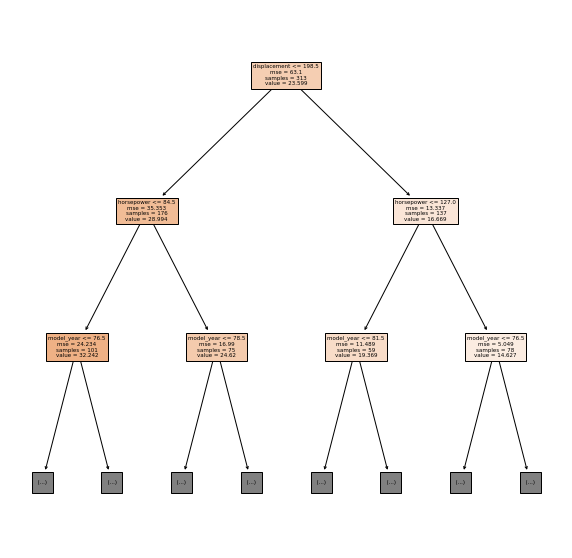

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2

from sklearn.tree import plot_tree

plt.figure(figsize = (10,10))
plot_tree(modelDTR, filled = True,  
          class_names = modelDTR.classes_, 
          feature_names=X_train.columns, 
          max_depth=2 )
plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
df_2 = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specificall, Torgersen = 0, Biscoe = 1, Dream = 2
spec = {'Adelie' : 0, 'Chinstrap' : 1, 'Gentoo' : 2}
isle = {'Torgersen' : 0, 'Biscoe' : 1, 'Dream' : 2}
df_2.dropna(inplace=True)
df_2['species'] = df_2['species'].map(spec)
df_2['island'] = df_2['island'].map(isle)
df_2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male


In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
X = df_2.drop('sex', axis=1)
y = df_2['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Using a random state of 42, fit the classification tree.
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier(max_depth = 3)
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Print the predictions on the test set
modelDTC.predict(X_test)


array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [ ]:
# Print the accuracy score for the predictions
print(modelDTC.score(X_train, y_train))
print(modelDTC.score(X_test, y_test))

0.9285714285714286
0.835820895522388


In [ ]:
# Print each feature with importance %
features = zip(X_test.columns, modelDTC.feature_importances_)
[print(x[0], round(x[1]*100, 3)) for x in features]

species 0.0
island 0.0
bill_length_mm 5.562
bill_depth_mm 55.683
flipper_length_mm 0.0
body_mass_g 38.755


[None, None, None, None, None, None]

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


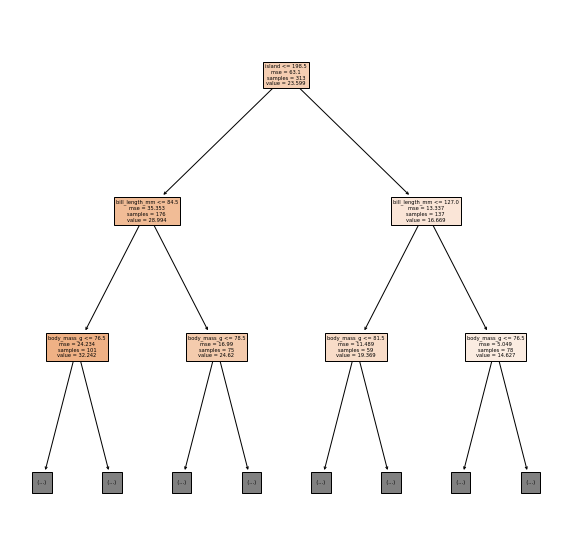

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
plt.figure(figsize = (10,10))
plot_tree(modelDTR, filled = True,  
          class_names = modelDTR.classes_, 
          feature_names=X_train.columns, 
          max_depth=2 )
plt.show()

# Effects of Chaning the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

To be explicit, changing any hyperparameter is not done after looking at the results of the test set!!*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

X = df_2.drop('sex', axis=1)
y = df_2['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


list_of_accuracies = []
for i in range(1, 11):
  modelDTC = DecisionTreeClassifier(max_depth = i)
  modelDTC.fit(X_train, y_train)
  acc = modelDTC.score(X_test, y_test)
  list_of_accuracies.append(acc)


<function matplotlib.pyplot.show>

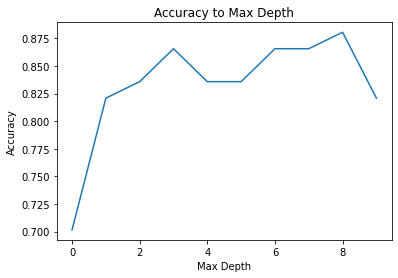

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
plt.plot(list_of_accuracies)
#plt.xticks(range(1, 11))
plt.title('Accuracy to Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show